<a href="https://colab.research.google.com/github/BbekShr/Neural_Network_Stock_Prediction/blob/main/Neural_Network_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Neural Network Stock Prediction**

In [ ]:
#import library
import pandas as pd

mydata = pd.read_csv('/content/20051201_20051210.csv', index_col = 'Date')
mydata

,Open,High,Low,Close,Volume
Date,,,,,
2005-12-01,10806.0,10934.9,10806.0,10912.6,256932865
2005-12-02,10912.0,10921.4,10861.7,10877.5,214888854
2005-12-05,10877.0,10877.0,10810.7,10835.0,237430947
2005-12-06,10835.4,10936.2,10835.4,10856.9,264721465
2005-12-07,10856.9,10868.1,10764.0,10810.9,243543206
2005-12-08,10808.4,10847.2,10729.7,10755.1,253313750
2005-12-09,10751.8,10806.0,10729.9,10778.6,238907145


In [ ]:
def add_original_feature(df, df_new):
  df_new['open'] = df['Open']
  df_new['open_1'] = df['Open'].shift(1)
  df_new['close_1'] = df['Close'].shift (1)
  df_new['high_1'] = df['High'].shift(1)
  df_new['low_1'] = df['Low'].shift(1)
  df_new['volume_1'] = df['Volume'].shift (1)

def add_avg_price(df, df_new):
  df_new['avg_price_5'] = df['Close'].rolling(5).mean().shift(1)
  df_new['avg_price_30'] = df['Close'].rolling(21).mean().shift(1)
  df_new['avg_price_365'] = df['Close'].rolling(252).mean().shift(1)
  df_new['ratio_avg_price_5_30'] = df_new['avg_price_5'] / df_new['avg_price_30']
  df_new['ratio_avg_price_5_365'] = df_new['avg_price_5'] / df_new['avg_price_365']
  df_new['ratio_avg_price_30_365'] = df_new['avg_price_30'] / df_new['avg_price_365']

def add_avg_volume(df, df_new):
  df_new['avg_volume_5'] = df['Volume'].rolling(5).mean().shift(1)
  df_new['avg_volume_30'] = df['Volume'].rolling(21).mean().shift (1)
  df_new['avg_volume_365'] = df['Volume'].rolling(252).mean().shift(1)
  df_new['ratio_avg_volume_5_30'] = df_new['avg_volume_5']/df_new['avg_volume_30']
  df_new['ratio_avg_volume_5_365'] = df_new['avg_volume_5'] / df_new[ 'avg_volume_365']
  df_new['ratio avg volume_30_365'] = df_new['avg_volume_30'] / df_new['avg_volume_365']

def add_std_price(df, df_new):
  df_new['std_price_5'] = df['Close'].rolling(5).std().shift(1)
  df_new['std_price_30'] = df['Close'].rolling(21).std().shift(1)
  df_new['std_price_365'] = df['Close'].rolling (252).std().shift(1)
  df_new['ratio_std_price_5_30'] = df_new['std_price_5'] / df_new['std_price_30']
  df_new['ratio_std_price_5_365'] = df_new['std_price_5'] / df_new['std_price_365']
  df_new['ratio_std_price_30_365'] = df_new['std_price_30'] / df_new['std_price_365']

def add_std_volume(df, df_new) :
  df_new['std_volume_5'] = df['Volume'].rolling(5).std().shift(1)
  df_new['std_volume_30'] = df['Volume'].rolling(21).std().shift (1)
  df_new['std_volume_365'] = df['Volume'].rolling(252).std().shift(1)
  df_new['ratio_std_volume_5_30'] = df_new['std_volume_5'] / df_new['std_volume_30']
  df_new['ratio_std_volume_5_365'] = df_new['std_volume_5'] / df_new['std_volume_365']
  df_new['ratio_std_volume_30_365'] = df_new['std_volume_30'] / df_new['std_volume_365']

def add_return_feature (df, df_new):
  df_new['return_1'] = ((df['Close'] - df['Close'].shift(1))/ df['Close'].shift (1)).shift(1)
  df_new['return_5'] = ((df['Close'] - df['Close'].shift (5)) / df['Close'].shift (5)).shift(1)
  df_new['return_30'] = ((df['Close'] - df['Close'].shift (21)) / df['Close'].shift (21)).shift(1)
  df_new['return_365'] = ((df['Close'] - df['Close'].shift (252)) / df['Close'].shift (252)).shift(1)
  df_new['moving_avg_5'] = df_new['return_1'].rolling(5).mean().shift(1)
  df_new['moving_avg_30'] = df_new['return_1'].rolling(21).mean().shift(1)
  df_new['moving_ave_365'] = df_new['return_1'].rolling(252).mean().shift(1)

def generate_features (df):
  '''
  Generate features for a stock/index based on historical price and performance
  @param df: dataframe with columns "Open", "Close", "High",
  "Low"
  "Volume"
  , "Adjusted Close"
  @return: dataframe, data set with new features
  '''
  df_new = pd.DataFrame()
  # 6 original features
  add_original_feature(df, df_new)
  # 31 generated features
  add_avg_price(df, df_new)
  add_avg_volume (df, df_new)
  add_std_price(df, df_new)
  add_std_volume(df, df_new)
  add_return_feature(df, df_new)
  # the target
  df_new['close'] = df['Close']
  df_new = df_new.dropna(axis=0)
  return df_new

In [ ]:
data_raw = pd.read_csv('/content/19880101_20191231.csv', index_col='Date')
data = generate_features(data_raw)

print (data.round(decimals=3).head(5))

              open  open_1  close_1  high_1   low_1    volume_1  avg_price_5  \
Date                                                                           
1989-01-04  2146.6  2168.4   2144.6  2168.4  2127.1  17302883.0      2165.00   
1989-01-05  2177.7  2146.6   2177.7  2183.4  2146.6  15714720.0      2168.00   
1989-01-06  2190.5  2177.7   2190.5  2205.2  2173.0  20303094.0      2172.82   
1989-01-09  2194.3  2190.5   2194.3  2213.8  2182.3  16494441.0      2175.14   
1989-01-10  2199.5  2194.3   2199.5  2209.1  2185.0  18410324.0      2181.32   

            avg_price_30  avg_price_365  ratio_avg_price_5_30  ...  \
Date                                                           ...   
1989-01-04      2150.624       2062.113                 1.007  ...   
1989-01-05      2154.690       2062.668                 1.006  ...   
1989-01-06      2157.867       2063.218                 1.007  ...   
1989-01-09      2160.005       2064.341                 1.007  ...   
1989-01-10      216

In [ ]:
# Define the training and testing periods
start_train = '1988-01-01'
end_train = '2018-12-31'
start_test = '2019-01-01'
end_test = '2019-12-31'

# Slice the original data to obtain the training and testing sets
data_train = data.loc[start_train:end_train]
X_train = data_train.drop('close', axis=1).values # Obtain the features for the training set
y_train = data_train['close'].values # Obtain the target variable for the training set
data_test = data.loc[start_test:end_test]
X_test = data_test.drop('close',axis=1).values # Obtain the features for the testing set
y_test = data_test['close'].values # Obtain the target variable for the testing set

# Scale the features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled_train = scaler.fit_transform(X_train) # Scale the features in the training set
X_scaled_test = scaler.transform(X_test) # Scale the features in the testing set

# Define the neural network model using Keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(units=32, activation='relu'), # Add a fully connected layer with 32 hidden units and ReLU activation
    Dense(units=1) # Add a fully connected output layer with one unit
])


In [ ]:
import tensorflow as tf
from tensorflow import keras

# Compile the model using mean squared error loss function and Adam optimizer with learning rate of 0.1
model.compile(loss='mean_squared_error',
              optimizer = tf.keras.optimizers.Adam(0.1))


In [ ]:
#Fit model
model.fit(X_scaled_train, y_train, epochs=100, verbose = True)

Epoch 1/100
237/237 [==============================] - 1s 2ms/step - loss: 33018948.0000
Epoch 2/100
237/237 [==============================] - 0s 2ms/step - loss: 1962912.2500
Epoch 3/100
237/237 [==============================] - 1s 2ms/step - loss: 489501.8750
Epoch 4/100
237/237 [==============================] - 1s 2ms/step - loss: 178863.0938
Epoch 5/100
237/237 [==============================] - 1s 2ms/step - loss: 78800.4531
Epoch 6/100
237/237 [==============================] - 1s 2ms/step - loss: 48516.0195
Epoch 7/100
237/237 [==============================] - 1s 2ms/step - loss: 33074.5664
Epoch 8/100
237/237 [==============================] - 1s 3ms/step - loss: 27633.5547
Epoch 9/100
237/237 [==============================] - 0s 2ms/step - loss: 25903.6465
Epoch 10/100
237/237 [==============================] - 0s 2ms/step - loss: 25203.6367
Epoch 11/100
237/237 [==============================] - 0s 2ms/step - loss: 26819.2598
Epoch 12/100
237/237 [=======================

In [ ]:
#Import necessary libraries
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Generate predictions from the model using the scaled test data
predictions = model.predict(X_scaled_test)

print (f'MSE: {mean_squared_error(y_test, predictions) : .3f}')
print (f'MAE: {mean_absolute_error (y_test, predictions):.3f}')
print (f'R^2: {r2_score(y_test, predictions) : .3f}')


8/8 [==============================] - 0s 2ms/step
MSE:  178977.624
MAE: 377.035
R^2:  0.846


In [ ]:
from tensorboard.plugins.hparams import api as hp

#Defining hyperparameters and their ranges
HP_HIDDEN = hp.HParam('hidden_size', hp.Discrete ([64, 32, 16]))
HP_EPOCHS = hp.HParam('epochs', hp.Discrete([300, 1000]))
HP_LEARNING_RATE = hp.HParam('learning_rate',hp. RealInterval (0.01, 0.4))

In [ ]:
def train_test_model(hparams, logdir):
  # Define the model architecture
  model = Sequential([
      Dense(units=hparams[HP_HIDDEN], activation='relu'),
      Dense(units=1)
  ])

  # Compile the model with the given learning rate and loss function
  model.compile(
      loss='mean_squared_error',
      optimizer=tf.keras.optimizers.Adam(hparams[HP_LEARNING_RATE]),
      metrics=['mean_squared_error']
  )

  # Train the model with the given hyperparameters and log the results to TensorBoard
  model.fit(
      X_scaled_train, y_train,
      validation_data=(X_scaled_test, y_test),
      epochs=hparams[HP_EPOCHS],
      verbose=False,
      callbacks=[
          tf.keras.callbacks.TensorBoard(logdir),
          hp.KerasCallback(logdir, hparams),  # log the hyperparameters to TensorBoard
          tf.keras.callbacks.EarlyStopping(
              monitor='val_loss',
              min_delta=0,
              patience=200,
              verbose=0,
              mode='auto',
          ),
      ]
  )

  # Evaluate the model on the test set
  _, mse = model.evaluate(X_scaled_test, y_test)
  pred = model.predict(X_scaled_test)
  r2 = r2_score(y_test, pred)

  return mse, r2


In [ ]:
def run(hparams, logdir):
    # Define the hyperparameters configuration for TensorBoard
    with tf.summary.create_file_writer(logdir).as_default():
        hp.hparams_config(
            hparams=[HP_HIDDEN, HP_EPOCHS, HP_LEARNING_RATE],
            metrics=[
                hp.Metric('mean_squared_error', display_name='mse'),
                hp.Metric('r2', display_name='r2')
            ],
        )
    # Train and test the model for the current hyperparameters configuration
    mse, r2 = train_test_model(hparams, logdir)
    tf.summary.scalar('mean_squared_error', mse, step=1)
    tf.summary.scalar('r2', r2, step=1)

# We now train the model for each different combination of the hyperparameters in a grid search manner:
session_num = 0
for hidden in HP_HIDDEN.domain.values:
    for epochs in HP_EPOCHS.domain.values:
        # Linearly space the learning rate over its domain
        for learning_rate in tf.linspace(HP_LEARNING_RATE.domain.min_value, HP_LEARNING_RATE.domain.max_value, 5):
            # Create a dictionary of hyperparameters for the current trial
            hparams = {
                HP_HIDDEN: hidden,
                HP_EPOCHS: epochs,
                HP_LEARNING_RATE: float("%.2f" % float(learning_rate)),
            }
            run_name = "run-%d" % session_num
            print('- - - Starting trial: %s' % run_name)
            print({h.name: hparams[h] for h in hparams})
            run(hparams, 'logs/hparam_tuning/' + run_name)
            session_num += 1


- - - Starting trial: run-0
{'hidden_size': 16, 'epochs': 300, 'learning_rate': 0.01}
8/8 [==============================] - 0s 2ms/step
- - - Starting trial: run-1
{'hidden_size': 16, 'epochs': 300, 'learning_rate': 0.11}
8/8 [==============================] - 0s 2ms/step
- - - Starting trial: run-2
{'hidden_size': 16, 'epochs': 300, 'learning_rate': 0.21}
8/8 [==============================] - 0s 2ms/step
- - - Starting trial: run-3
{'hidden_size': 16, 'epochs': 300, 'learning_rate': 0.3}
8/8 [==============================] - 0s 2ms/step
- - - Starting trial: run-4
{'hidden_size': 16, 'epochs': 300, 'learning_rate': 0.4}
8/8 [==============================] - 0s 2ms/step
- - - Starting trial: run-5
{'hidden_size': 16, 'epochs': 1000, 'learning_rate': 0.01}
8/8 [==============================] - 0s 2ms/step
- - - Starting trial: run-6
{'hidden_size': 16, 'epochs': 1000, 'learning_rate': 0.11}
8/8 [==============================] - 0s 2ms/step
- - - Starting trial: run-7
{'hidden_size

8/8 [==============================] - 0s 3ms/step


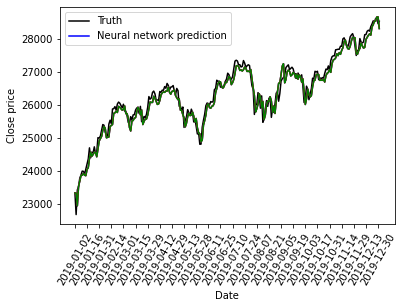

In [ ]:
# Define the neural network architecture
model = Sequential([Dense(units=16, activation='relu'), Dense(units=1)])

# Compile the model with mean squared error loss and Adam optimizer
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.21))

# Train the model on the scaled training data for 1000 epochs
model.fit(X_scaled_train, y_train, epochs=1000, verbose=False)

# Generate predictions for the scaled test data
predictions = model.predict(X_scaled_test)[:, 0]

# Plot the actual test data, predicted values, and a few variations
import matplotlib.pyplot as plt
plt.plot(data_test.index, y_test, c='k')  # actual test data
plt.plot(data_test.index, predictions, c='b')  # neural network prediction in blue
plt.plot(data_test.index, predictions+0.5, c='r')  # neural network prediction + 0.5 in red
plt.plot(data_test.index, predictions-0.5, c='g')  # neural network prediction - 0.5 in green

# Add axis labels, a title, and a legend
plt.xticks(range(0, 252, 10), rotation=60)
plt.xlabel('Date')
plt.ylabel('Close price')
plt.legend(['Truth', 'Neural network prediction'])

# Display the plot
plt.show()
